<a href="https://colab.research.google.com/github/desunny/example/blob/desunny-steel/(forS)_Lec07_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC(%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정트리
  - 레드와인 화이트와인 분류 문제 
  

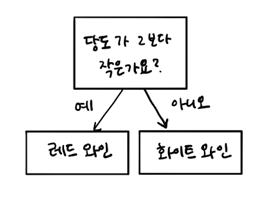

## 데이터 준비하기


In [ ]:
#판다스로 데이터 불러오기
import pandas as pd

wine_data = pd.read_csv('https://bit.ly/wine_csv_data')
wine_data.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine_data.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
#1. 종속변수와 타겟변수 분리하기
data = wine_data[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine_data['class'].to_numpy()


#2. 훈련데이터와 테스트 데이터로 분리하기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,test_size=0.2, random_state=42) #default test_size = 0.25 

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)



(5197, 3) (5197,)
(1300, 3) (1300,)


In [ ]:
#3. x 변수의 scaler 값 표준화하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:5])
print(test_scaled[:5])


[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 [ 1.0211032  -0.89065017  0.958848  ]
 [-0.99357172  2.07007555 -0.67009777]]
[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 [-0.82568214  1.19436794 -0.60744601]
 [-1.32935087  1.75732283 -0.67009777]]


## 로지스틱 회귀로 학습하기

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_scaled, train_target, )
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
lr = LogisticRegression(C=100, max_iter=1000) #C 규제강도 높으면 낮은것

lr.fit(train_scaled, train_target, )
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7802578410621512
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.514828    1.68425711 -0.68892353]] [1.82393725]


##의사결정트리로 분석하기
 - 설명하기 쉬운 분석 모델 (왜 이런 결과가 나왔나요?)
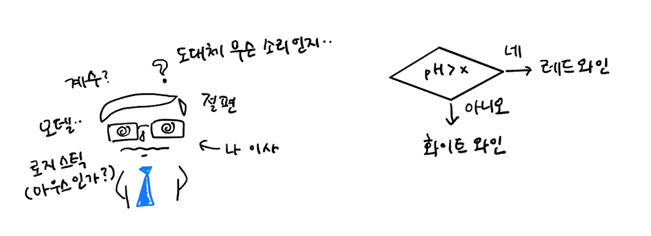

In [ ]:
#의사결정트리 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


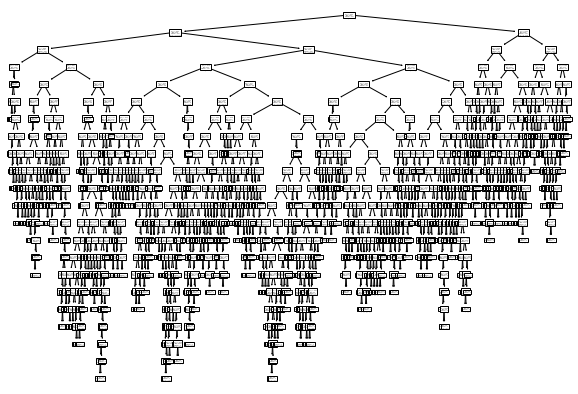

In [ ]:
#이미지로 그리기 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [ ]:
#가지치기 (max_depth) - 과적합을 방지하기 위해서 
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))


0.8454877814123533
0.8415384615384616


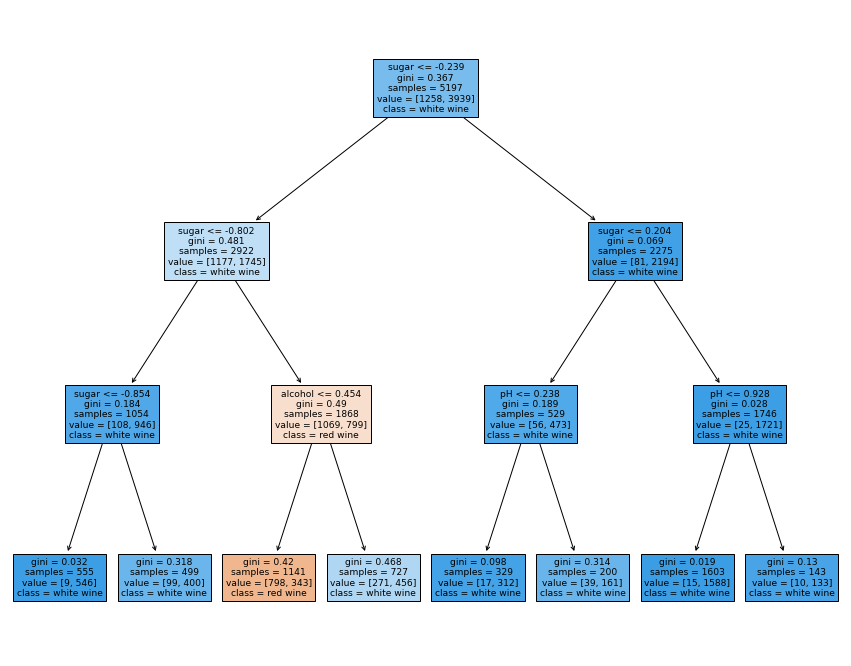

In [ ]:
#그림그리기
plt.figure(figsize=(15,12))
plot_tree(dt, feature_names=['alcohol', 'sugar', 'pH'], filled=True, class_names=['red wine', 'white wine'])
plt.show()

 - sugar <= -0.802 라니? 설명 방법은?  ==> 의사결정트리는 스케일 표준화가 필요하지 않음. 특성값의 스케일은 결정트리 알고리즘에 영향을 주지 않음 

### 실습1. 스케일 없는 데이터 활용

In [ ]:
# 스케일이 없는 데이터로 훈련하기 



0.8454877814123533
0.8415384615384616


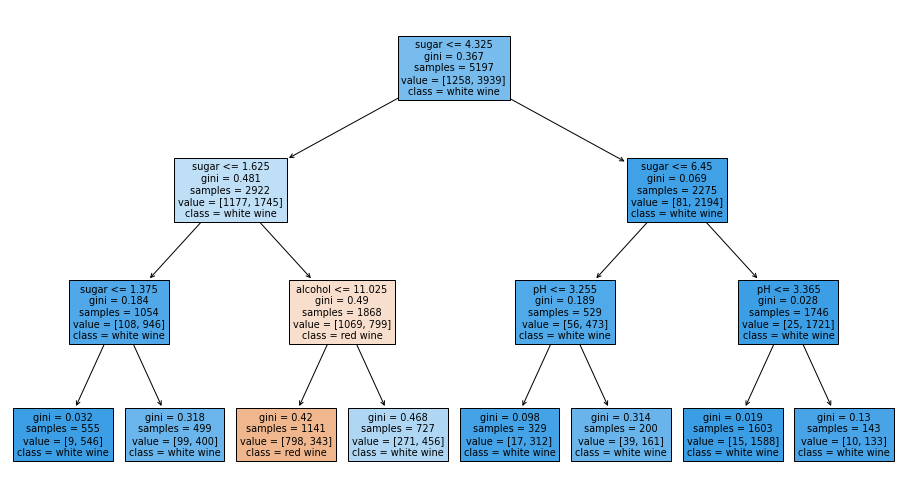

In [ ]:
# 스케일이 없는 데이터로 훈련한 내용을 트리로 그리기 


# 결정트리 - 교차검증, 그리드 서치
  - 레드와인 화이트와인 분류 문제 
  - 교차 검증과 그리드 서치 사용(테스트 세트 학습을 방지 하기 위해서) 

## 데이터 준비하기


In [ ]:
#pandas로 data import 하기 
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
print(wine.describe)

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

<bound method NDFrame.describe of       alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]>


## 검증세트 활용하기
  - 테스트 세트를 검증에 사용할 경우, 테스트 세트 자체를 학습하는 문제가 발생
  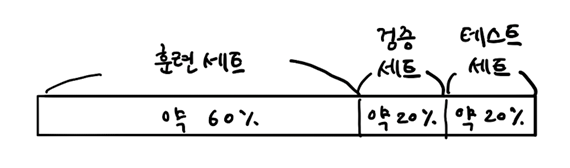

In [ ]:
#훈련세트와 테스트 세트 나누기 

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)

#훈련세트를 훈련세트와 검증세트로 나누기
trainV_input, val_input, trainV_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(trainV_input.shape, val_input.shape)


(5197, 3) (1300, 3)
(4157, 3) (1040, 3)


In [ ]:
#학습하기 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(trainV_input, trainV_target)
print(dt.score(trainV_input, trainV_target))
print(dt.score(val_input, val_target))


0.9971133028626413
0.8653846153846154


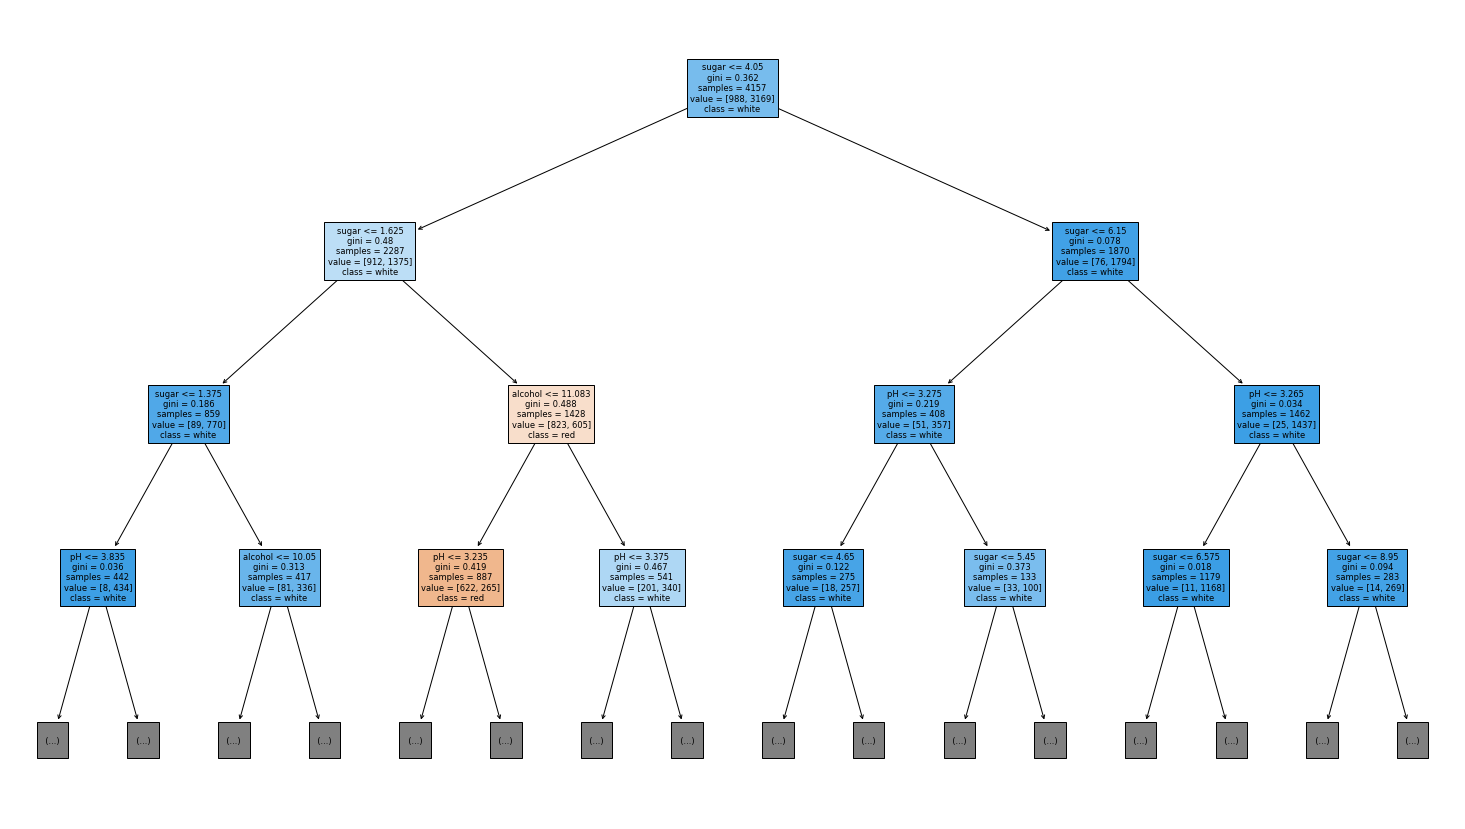

In [ ]:
plt.figure(figsize=(26,15))
plot_tree(dt, max_depth=3, feature_names=['alcohol', 'sugar', 'pH'], filled=True, class_names=['red', 'white'])
plt.show()

## 교차검증

### K-Fold 교차 검증 
  - 데이터가 많으면 많을 수록 성능이 좋음. 데이터가 부족할 때 성능을 향상시키기 위해서 사용
  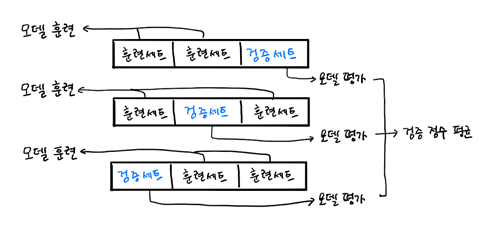

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target) #평가할 모델 객체와 훈련세트 전체를 매개변수로 전달. 내부적으로 데이터를 분할하여 훈련시킴 
print(scores) #기본 5-fold 교차검증 수행

{'fit_time': array([0.00698829, 0.00663829, 0.00695443, 0.00735426, 0.00714612]), 'score_time': array([0.00071502, 0.00067925, 0.00063419, 0.00082994, 0.00067997]), 'test_score': array([0.86442308, 0.84423077, 0.87969201, 0.84600577, 0.83638114])}


In [ ]:
# 명시적으로 층화추출을 지정하기. 명시하지 않을 경우 분류문제에서는 층화추출을 사용하며, 회귀문제에서는 K-Fold 분할기를 사용함
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores['test_score'])

import numpy as np
print(round(np.mean(scores['test_score']),2)) #scores의 값을 평균한 값 

[0.83461538 0.88461538 0.84230769 0.85192308 0.83846154 0.86346154
 0.86730769 0.85356455 0.84971098 0.87475915]
0.86


### 하이퍼 파라미터 튜닝

#### 그리드서치

In [ ]:
#싸이킷런에서 제공하는 GridSearchCV Library를 활용. 왜냐하면 독립변수(Feature)의 수가 많을 경우 for loop를 돌면서 코그로 일일이 구현하면 복잡하기 때문임

from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

#n_jobs cpu의 코어 갯수. -1은 가지고 있는 모든 것 사용하기. 왜? 파라미터별 5번씩 층화추출하여 후련하는 모델임. 훈련수가 많아짐 
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1) 

gs.fit(train_input, train_target)

dt = gs.best_estimator_ # 최적모델: GridSearch로 찾은 최적의 매개변수 조합으로 훈련된 세트 
print(dt.score(train_input, train_target))

print(gs.best_estimator_)
print(gs.best_params_) #최적 파라미터 
print(gs.best_score_)


0.9615162593804117
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
{'min_impurity_decrease': 0.0001}
0.8681929740134745


In [ ]:
print(gs.cv_results_['mean_test_score']) #5번 수행한 값의 평균 

best_index = np.argmax(gs.cv_results_['mean_test_score']) #가장 높은 점수를 가진 것의 인덱스 구하기 
print(gs.cv_results_['params'][best_index]) #최적 파라미터 

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]
{'min_impurity_decrease': 0.0001}


In [ ]:
#파라미터 효율적으로 생성하기. 훈련하는 모델의 갯수 = 9 x 15 x10 x 5 = 1,350(파라미터수) x 5(층화추출수) = 6,750개 
params = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001), #9
          'max_depth': range(5, 20, 1),                              #15
          'min_samples_split': range(2, 100, 10)                    #10
          }

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target) 


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'm

In [ ]:
dt = gs.best_estimator_

print(dt.score(train_input, train_target))

0.892053107562055


In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}
0.8683865773302731


#### 랜덤서치
  - 매개변수의 값이 수치일 때 범위나 간격을 정하는 기준이 없음 
  - 너무 많은 매개변수가 있을 경우 수행 시간이 오래 걸리는 문제를 보완

In [ ]:
from scipy.stats import uniform, randint #싸이파이 - 적분, 보간, 선형대수, 확률 ㄷㅇ을 포함한 수치 계산 전용 라이브러리

params = {
    'min_impurity_decrease': uniform(0.0001, 0.001), #uniform 실수 랜덤을 뽑을 때 
    'max_depth': randint(20,50), #randint 정수 랜덤을 뽑을 때 
    'min_samples_split': randint(2,25),
    'min_samples_leaf': randint(1,25),
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)

gs.fit(train_input, train_target)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
         

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))
print(gs.best_score_)
print(gs.best_params_)

0.8695428296438884
{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884


In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.8928227823744468


In [ ]:
print(dt.score(test_input, test_target))

0.86


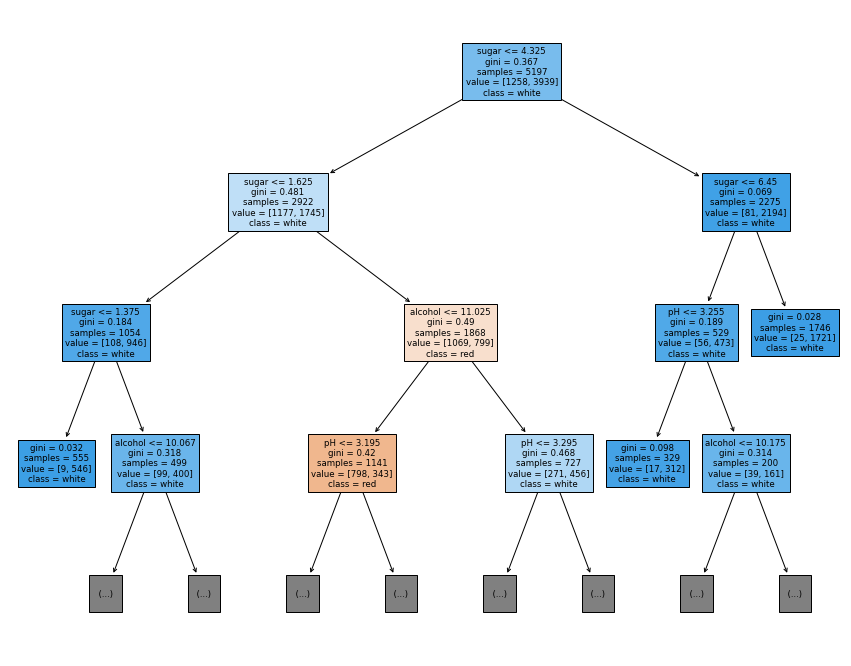

In [ ]:
plt.figure(figsize=(15,12))
plot_tree(dt, max_depth=3, feature_names=['alcohol', 'sugar', 'pH'], filled=True, class_names=['red', 'white'])
plt.show()

In [ ]:
#특성 중요도
print(dt.feature_importances_)

[0.16773734 0.69008328 0.14217938]


## [실습2 - 암환자 분류하기]

In [ ]:
# 암환자 데이터 불러오기 
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

print(type(breast_cancer_data))
print(breast_cancer_data.data)

<class 'sklearn.utils.Bunch'>
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
#데이터 확인하기 
import pandas as pd

input_data = pd.DataFrame(breast_cancer_data.data)
input_target = pd.DataFrame(breast_cancer_data.target)

print(input_data.head(5))
print('-----')
print(input_target.head(5))

      0      1       2       3   ...      26      27      28       29
0  17.99  10.38  122.80  1001.0  ...  0.7119  0.2654  0.4601  0.11890
1  20.57  17.77  132.90  1326.0  ...  0.2416  0.1860  0.2750  0.08902
2  19.69  21.25  130.00  1203.0  ...  0.4504  0.2430  0.3613  0.08758
3  11.42  20.38   77.58   386.1  ...  0.6869  0.2575  0.6638  0.17300
4  20.29  14.34  135.10  1297.0  ...  0.4000  0.1625  0.2364  0.07678

[5 rows x 30 columns]
-----
   0
0  0
1  0
2  0
3  0
4  0


In [ ]:
print(breast_cancer_data.feature_names)
print(breast_cancer_data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [ ]:
input_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#문제1. 데이터(input_data)를 train, Validation, test로 분류한 후 그 길이를 화면에 출력합니다. 이때 데이터 비율을 60, 20, 20로 정의합니다. random_state는 42로 정의합니다. 

# 1-1. 훈련세트와 테스트 세트로 분류하기 

# 1-2. 훈련세트를 훈련세트와 검증세트로 나누기



(455, 30) (114, 30)
(364, 30) (91, 30)


In [ ]:
#문제2. Decision Tree 모델을 생성합니다. 트렌인 스코어와 밸리데이션 스코어, 테스트 스코어를 화면에 출력합니다. 


1.0
0.9230769230769231


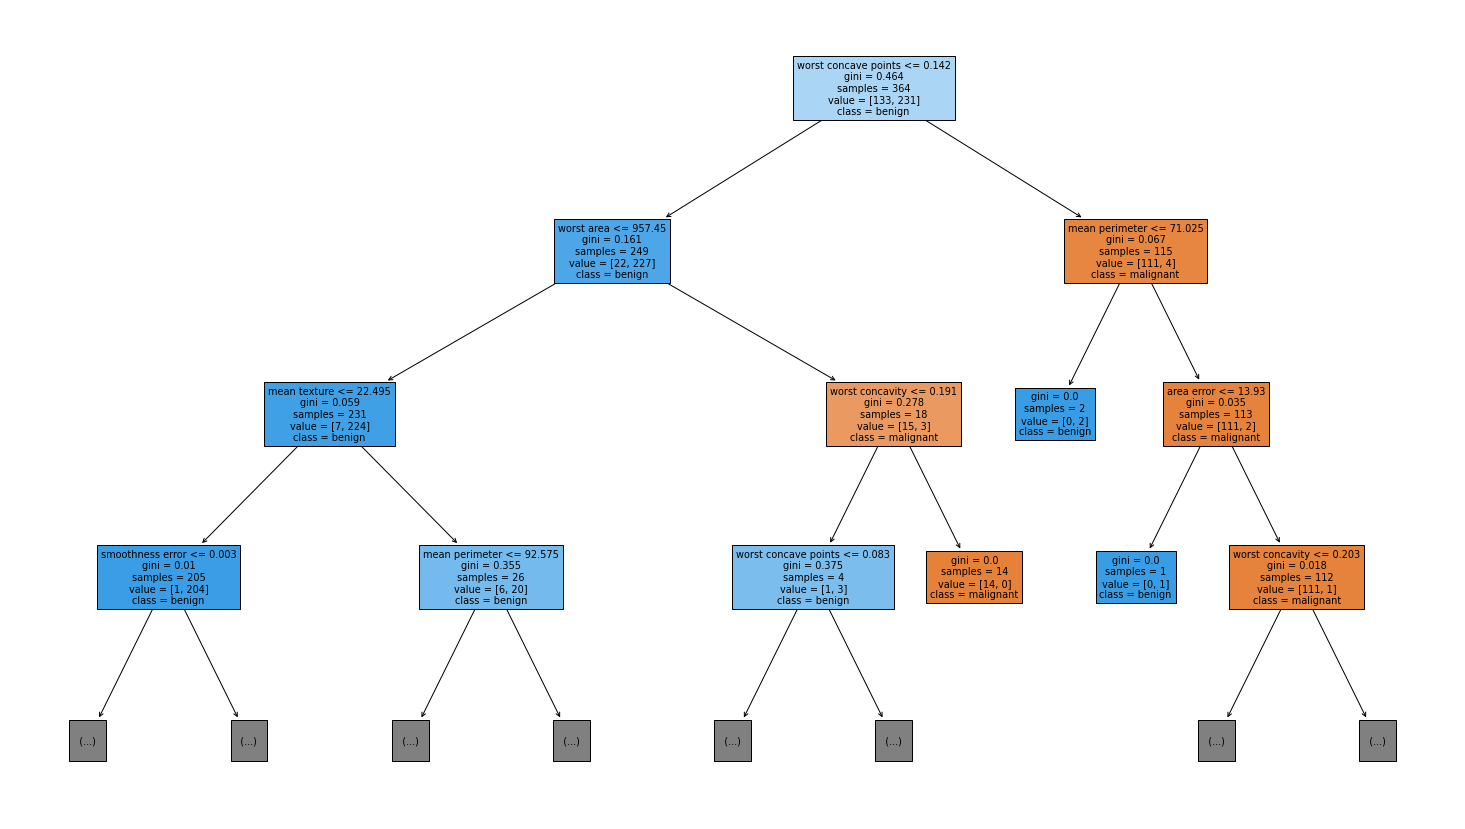

In [ ]:
#문제3. 트리 플롯을 그립니다. 
# feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
# 'mean smoothness', 'mean compactness', 'mean concavity',
# 'mean concave points', 'mean symmetry', 'mean fractal dimension',
# 'radius error', 'texture error', 'perimeter error', 'area error',
# 'smoothness error', 'compactness error', 'concavity error',
# 'concave points error', 'symmetry error', 'fractal dimension error',
# 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
# 'worst smoothness', 'worst compactness', 'worst concavity',
# 'worst concave points', 'worst symmetry', 'worst fractal dimension']
# class_names=['malignant', 'benign']
